# Day 24: Planet of Discord

https://adventofcode.com/2019/day/24

## Part 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#infile = "./data/day24test.txt"
infile = "./data/input24.txt"

with open(infile) as f:
    lines = [l.strip('\n') for l in f ]
lines

['..##.', '#....', '.....', '#.#.#', '#..#.']

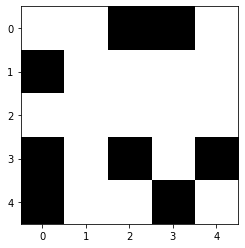

In [8]:
size = 5
bugs = np.zeros((size,size))

for y in range(len(lines)):
    for x in range(len(lines[y])):
        if lines[y][x]=='.': 
            bugs[y][x]=0
        else:
            bugs[y][x]=1

plt.imshow(bugs, cmap='binary')
plt.show()

In [9]:
def survivalOld(y,x,area):
    # Each minute, The bugs live and die based on the number of bugs in the four adjacent tiles:
    # A bug dies (becoming an empty space) unless there is exactly one bug adjacent to it.
    # An empty space becomes infested with a bug if exactly one or two bugs are adjacent to it.
    neighbours = 0
    if x==0:
        if y==0:
            neighbours = area[y,x+1] + area[y+1,x]
        elif y==len(area)-1:
            neighbours = area[y-1,x] + area[y,x+1]
        else:
            neighbours = area[y,x+1] + area[y-1,x] + area[y+1,x]
    elif x==len(area[0])-1:
        if y==0:
            neighbours = area[y,x-1] + area[y+1,x]
        elif y==len(area)-1:
            neighbours = area[y-1,x] + area[y,x-1]
        else:
            neighbours = area[y,x-1] + area[y-1,x] + area[y+1,x]   
    else:
        if y==0:
            neighbours = area[y,x-1] + area[y,x+1] + area[y+1,x]   
        elif y==len(area)-1:
            neighbours = area[y,x-1] + area[y,x+1] + area[y-1,x]
        else:
            neighbours = area[y,x-1] + area[y,x+1] + area[y-1,x] + area[y+1,x]
    if area[y,x]==1 and neighbours!=1:
        return 0
    elif area[y,x]==0 and ( neighbours==1 or neighbours==2 ):
        return 1
    else:
        return area[y,x]

def survival(y,x,area):
    # Add empty borders to ease neighbours check
    borders = np.zeros((area.shape[0]+2,area.shape[1]+2))
    borders[1:area.shape[0]+1,1:area.shape[1]+1] = area
    xb = x+1
    yb = y+1
    neighbours = borders[yb,xb-1] + borders[yb,xb+1] + borders[yb-1,xb] + borders[yb+1,xb]
    if area[y,x]==1 and neighbours!=1:
        return 0
    elif area[y,x]==0 and ( neighbours==1 or neighbours==2 ):
        return 1
    else:
        return area[y,x]
    
def evolve(area):
    newarea = np.copy(area)
    # Apply the survival function to every cell in the area
    for y in range(area.shape[0]):
        for x in range(area.shape[1]):
            newarea[y,x] = survival(y,x,area)
    return newarea

def bugsBiodiversity(area):
    temp = area.reshape(area.shape[0]*area.shape[1])
    temp = temp[::-1]
    return int(temp.dot(2**np.arange(temp.size)[::-1]))

Found duplicate state!
Biodiversity = 19923473


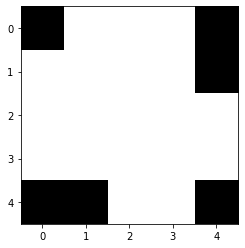

In [10]:
bughash = []
bughash.append(bugsBiodiversity(bugs))

h = 0
while(True):
    bugs = evolve(bugs)
    h = bugsBiodiversity(bugs)
    if h in bughash:
        print("Found duplicate state!")
        break
    else:
        bughash.append(h)

print("Biodiversity =",h)
plt.imshow(bugs, cmap='binary')
plt.show()